<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/DUDL_Data_DatasetLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# Create some data in numpy
nObservations = 100
nFeatures= 20

data = np.random.randn(nObservations, nFeatures)

In [3]:
data.shape

(100, 20)

In [4]:
data[0].shape

(20,)

In [5]:
data[0]

array([-1.99595776, -0.23838299,  0.40028864, -0.00804818, -0.00791689,
       -0.28015421,  1.31003436, -1.09217804, -1.41511431,  2.56575001,
        0.57159963, -1.65469681, -1.09203174,  1.52369808,  1.64477051,
       -0.73986151, -1.84540342,  1.30088735, -1.45853555,  0.01511512])

In [6]:
# Convert to pytorch tensor
dataT = torch.tensor(data)
dataT.shape

torch.Size([100, 20])

In [7]:
dataT[0]

tensor([-1.9960, -0.2384,  0.4003, -0.0080, -0.0079, -0.2802,  1.3100, -1.0922,
        -1.4151,  2.5658,  0.5716, -1.6547, -1.0920,  1.5237,  1.6448, -0.7399,
        -1.8454,  1.3009, -1.4585,  0.0151], dtype=torch.float64)

In [8]:
# print out some information
print('NumPy data:')
print(type(data))
print(data.shape)
print(data.dtype)

NumPy data:
<class 'numpy.ndarray'>
(100, 20)
float64


In [9]:
print('Tensor data:')
print(type(dataT))
print(dataT.size()) # torch -> .size()
print(dataT.dtype)

Tensor data:
<class 'torch.Tensor'>
torch.Size([100, 20])
torch.float64


In [10]:
# Sometimes you need to convert data types
dataT2 = torch.Tensor( data ).float()
print(dataT2.dtype)

torch.float32


In [11]:
dataT3 = torch.tensor( data ).long()
print(dataT3.dtype)

torch.int64


In [12]:
# Convert tensor into PyTorch datasets
dataset = TensorDataset(data)

TypeError: 'int' object is not callable

In [13]:
dataset = TensorDataset(dataT)

In [14]:
dir(dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_protocol',
 'tensors']

In [15]:
dataset.tensors

(tensor([[-1.9960, -0.2384,  0.4003,  ...,  1.3009, -1.4585,  0.0151],
         [-0.2837, -1.2202,  0.9641,  ...,  0.2790,  0.0955, -0.1362],
         [ 0.7649, -1.3001, -1.6977,  ..., -1.1683,  0.7401,  0.0054],
         ...,
         [-0.4546,  1.1998, -0.4908,  ..., -0.2605,  0.5017, -0.0612],
         [ 0.1172, -1.3520,  0.1893,  ...,  0.1290, -0.3309,  0.3599],
         [ 0.2043, -0.1611, -1.1857,  ..., -0.1206, -0.5124, -2.0199]],
        dtype=torch.float64),)

In [16]:
type(dataset.tensors)

tuple

In [17]:
dataset.tensors[0]

tensor([[-1.9960, -0.2384,  0.4003,  ...,  1.3009, -1.4585,  0.0151],
        [-0.2837, -1.2202,  0.9641,  ...,  0.2790,  0.0955, -0.1362],
        [ 0.7649, -1.3001, -1.6977,  ..., -1.1683,  0.7401,  0.0054],
        ...,
        [-0.4546,  1.1998, -0.4908,  ..., -0.2605,  0.5017, -0.0612],
        [ 0.1172, -1.3520,  0.1893,  ...,  0.1290, -0.3309,  0.3599],
        [ 0.2043, -0.1611, -1.1857,  ..., -0.1206, -0.5124, -2.0199]],
       dtype=torch.float64)

In [18]:
dataset.tensors[0].shape

torch.Size([100, 20])

In [19]:
# Let's try again with labels
labels = torch.ceil( torch.linspace(.01, 4, nObservations) )
labels.shape

torch.Size([100])

In [20]:
# transform to an actual matrix (column vector)
labels = labels.reshape(shape=(len(labels), 1))
labels.shape

torch.Size([100, 1])

In [21]:
# now another dataset
dataset = TensorDataset(dataT, labels)
dataset

In [22]:
type(dataset.tensors)

tuple

In [23]:
dataset.tensors[0].shape

torch.Size([100, 20])

In [24]:
dataset.tensors[1].shape

torch.Size([100, 1])

In [25]:
dataset.tensors[0].size()

torch.Size([100, 20])

In [26]:
dataset.tensors[1].size()

torch.Size([100, 1])

In [27]:
np.shape( np.random.randint(5,size=nObservations) )

(100,)

In [28]:
# create a dataloader object
batchsize = 25
dataloader = DataLoader(dataset=dataset, batch_size=batchsize)
dir(dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'in_order',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 

In [29]:
dataloader.dataset.tensors[0]

tensor([[-1.9960, -0.2384,  0.4003,  ...,  1.3009, -1.4585,  0.0151],
        [-0.2837, -1.2202,  0.9641,  ...,  0.2790,  0.0955, -0.1362],
        [ 0.7649, -1.3001, -1.6977,  ..., -1.1683,  0.7401,  0.0054],
        ...,
        [-0.4546,  1.1998, -0.4908,  ..., -0.2605,  0.5017, -0.0612],
        [ 0.1172, -1.3520,  0.1893,  ...,  0.1290, -0.3309,  0.3599],
        [ 0.2043, -0.1611, -1.1857,  ..., -0.1206, -0.5124, -2.0199]],
       dtype=torch.float64)

In [30]:
dataloader.dataset.tensors[1]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
      

In [31]:
dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

In [32]:
dataloader.dataset.tensors[1].size()

torch.Size([100, 1])

In [33]:
# sizes of each batch
for dat, labs in dataloader:
  print('BATCH INFO:')
  print(dat.size())
  print(labs.size())
  print(' ')

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 


In [34]:
# inspect the labels
for dat, labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])
 
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])
 


In [35]:
# Try again with shuffling (shuffling happens during iterations)
dataloader = DataLoader(dataset=dataset, batch_size=batchsize, shuffle=True)

for dat, labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[2., 3., 4., 4., 2., 3., 1., 2., 2., 3., 2., 1., 3., 4., 1., 4., 3., 2.,
         2., 1., 4., 3., 1., 4., 4.]])
 
tensor([[1., 3., 3., 1., 1., 1., 4., 4., 1., 2., 1., 4., 4., 3., 4., 3., 1., 4.,
         1., 4., 3., 1., 3., 2., 2.]])
 
tensor([[1., 4., 3., 2., 2., 2., 4., 3., 4., 3., 4., 2., 1., 1., 2., 1., 3., 1.,
         2., 2., 3., 2., 4., 3., 4.]])
 
tensor([[2., 1., 1., 1., 3., 4., 2., 2., 4., 2., 3., 1., 2., 4., 2., 2., 4., 3.,
         3., 3., 1., 3., 3., 4., 1.]])
 


In [36]:
#dataloader = DataLoader(dataset=dataset, batch_size=batchsize, shuffle=True)

for dat, labs in dataloader:
  print(labs.T)
  print(' ')

tensor([[3., 2., 2., 2., 1., 4., 1., 1., 1., 1., 1., 2., 2., 3., 3., 1., 2., 3.,
         4., 2., 4., 1., 4., 1., 2.]])
 
tensor([[1., 1., 4., 2., 1., 3., 1., 2., 4., 1., 2., 3., 3., 3., 4., 2., 2., 2.,
         3., 3., 2., 4., 4., 1., 4.]])
 
tensor([[1., 4., 1., 1., 2., 2., 4., 4., 3., 1., 4., 4., 1., 4., 1., 3., 4., 3.,
         2., 3., 2., 2., 3., 3., 3.]])
 
tensor([[2., 1., 4., 4., 4., 4., 1., 3., 3., 2., 3., 1., 3., 3., 4., 4., 3., 3.,
         4., 2., 4., 2., 3., 2., 1.]])
 


In [37]:
# To get only one batch(e.g., for testing)
dat, labs = next(iter(dataloader))
labs

tensor([[2.],
        [3.],
        [4.],
        [2.],
        [4.],
        [2.],
        [3.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [1.],
        [3.],
        [4.],
        [3.],
        [4.],
        [1.],
        [1.],
        [3.],
        [4.],
        [2.],
        [4.],
        [4.],
        [1.]])

In [38]:
dataloader

In [39]:
iter(dataloader)

In [40]:
next(_)

[tensor([[ 1.0221,  0.1233, -0.5299, -0.4671, -0.9670,  1.7516, -0.3223, -0.1953,
           1.9569,  1.0632, -2.3021, -0.6015,  1.3315,  0.3683, -1.8475,  0.3013,
          -1.1100,  0.1914,  0.2058,  0.3023],
         [-1.6602, -1.3863,  0.7653,  1.5081, -0.4938,  0.0995, -1.9817,  0.5383,
          -0.3619,  0.2126,  0.9162,  1.6398,  1.3996,  1.1440, -0.5532,  0.2642,
           0.0984, -0.0699,  1.1596,  1.6262],
         [ 0.2094, -2.8539,  0.6796, -0.4317, -1.9267, -1.4468, -0.0571, -1.6198,
          -0.7163,  0.5024, -1.5954,  0.8861,  0.5991, -0.7256,  1.2262, -1.1152,
          -0.5618,  2.6128,  1.0983, -0.0816],
         [-0.2634, -1.6657, -1.1362, -0.2550, -0.1493, -0.5687,  0.2352, -0.0358,
          -1.6850, -0.5934, -1.2120,  0.3302,  0.3200, -0.1695, -1.8204,  0.7020,
          -0.1409, -0.9031, -1.2278, -0.5801],
         [ 0.1172, -1.3520,  0.1893, -0.6694, -0.4848,  0.5559, -1.8087,  0.8053,
           0.5867,  0.6015,  0.1790, -1.3300, -0.4566,  1.3306, -0.3381,  

In [41]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as mb
mb.set_matplotlib_formats('svg')

In [42]:
A = [1, 1]
B = [5, 1]
C = [4, 4]

nPerClust = 10

# Generate data
a = [A[0] + np.random.randn(nPerClust), A[1] + np.random.randn(nPerClust)]
b = [B[0] + np.random.randn(nPerClust), B[1] + np.random.randn(nPerClust)]
c = [C[0] + np.random.randn(nPerClust), C[1] + np.random.randn(nPerClust)]

In [43]:
a

[array([ 2.71113647, -0.62353441, -0.097035  , -0.46671342,  0.16525545,
         1.51479775,  0.44454675,  0.51730718,  1.39564663,  0.83343865]),
 array([ 0.76676287,  1.4820936 ,  1.05794758,  1.86848429,  0.3582703 ,
         0.70242625,  1.17125803, -0.42627124,  0.26403919,  1.08037549])]

In [44]:
a[0].shape

(10,)

In [45]:
# A function that creates data
def createSomeData(nPerClust):

  A = [1, 1]
  B = [5, 1]
  C = [4, 4]

  # Generate data
  a = [A[0] + np.random.randn(nPerClust), A[1] + np.random.randn(nPerClust)]
  b = [B[0] + np.random.randn(nPerClust), B[1] + np.random.randn(nPerClust)]
  c = [C[0] + np.random.randn(nPerClust), C[1] + np.random.randn(nPerClust)]

  # true labels
  labels_np = np.hstack((np.zeros((nPerClust)),
                         np.ones((nPerClust)),
                         1+np.ones((nPerClust))))

  # concatenate into a matrix, then convert to a pytorch tensor
  data_np = np.hstack((a, b, c)).T

  # New: put all outputs into a dictionary
  output = {}
  output['data'] = torch.tensor(data_np).float()
  output['labels'] = torch.tensor(labels_np).long() # note: "long" format (integers) for labels

  # use scikit-learn to split the data
  train_data, test_data, train_labels, test_labels = train_test_split(output['data'], output['labels'], train_size=.9)

  # then convert them into PyTorch Dataset(note: already converted to tensors)
  train_data = TensorDataset(train_data, train_labels)
  test_data = TensorDataset(test_data, test_labels)

  # finally, translate into dataloader objects
  batchsize = 8
  output['train_data'] = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
  output['test_data'] = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

  return output


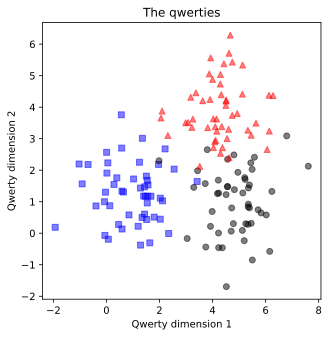

In [46]:
# Check that the function works

theData= createSomeData(50)

data = theData['data']
labels = theData['labels']

# show the data
fig = plt.figure(figsize=(5, 5))

plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs', alpha=.5)
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko', alpha=.5)
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1], 'r^', alpha=.5)

plt.title('The qwerties')
plt.xlabel('Qwerty dimension 1')
plt.ylabel('Qwerty dimension 2')
plt.show()

In [47]:
data.shape

torch.Size([150, 2])

In [48]:
labels.shape

torch.Size([150])

In [49]:
data[np.where(labels==0)]

tensor([[ 2.2119,  2.6756],
        [ 0.4604,  0.2771],
        [ 2.0292,  0.4454],
        [ 1.5547,  1.1761],
        [-0.0363,  1.3024],
        [ 0.5861,  1.3378],
        [ 0.6403,  1.3064],
        [ 1.0250,  1.7210],
        [-0.0709,  1.0006],
        [-1.9313,  0.1868],
        [ 1.5053,  1.8135],
        [-0.3932,  0.8657],
        [ 1.5393,  1.6781],
        [ 0.0082,  2.5669],
        [ 0.0720, -0.1917],
        [ 0.3917,  1.7572],
        [ 0.5619,  3.7582],
        [-0.9142,  1.5655],
        [ 1.6360, -0.3054],
        [ 1.6784,  1.1733],
        [ 1.2823,  1.4332],
        [ 1.5400,  0.9600],
        [ 2.5529,  2.0336],
        [-0.6920,  2.1792],
        [ 1.3556,  3.0118],
        [ 3.4194,  1.6418],
        [ 1.4745,  1.1700],
        [ 1.5674,  1.5334],
        [-0.0572, -0.0696],
        [ 1.4045,  1.1793],
        [ 1.5186,  0.4355],
        [ 1.9647,  2.1828],
        [ 0.5752,  2.7018],
        [ 2.3476, -0.0088],
        [ 2.0307,  1.1128],
        [ 0.1275,  0

In [50]:
data[np.where(labels==0)[0], 0]

tensor([ 2.2119,  0.4604,  2.0292,  1.5547, -0.0363,  0.5861,  0.6403,  1.0250,
        -0.0709, -1.9313,  1.5053, -0.3932,  1.5393,  0.0082,  0.0720,  0.3917,
         0.5619, -0.9142,  1.6360,  1.6784,  1.2823,  1.5400,  2.5529, -0.6920,
         1.3556,  3.4194,  1.4745,  1.5674, -0.0572,  1.4045,  1.5186,  1.9647,
         0.5752,  2.3476,  2.0307,  0.1275,  1.3448, -1.0302,  1.2456,  1.8001,
         0.0523,  0.0182,  0.5894,  2.1142,  0.8503,  1.2864,  0.2850,  1.4384,
         1.4374,  1.1954])

In [51]:
data[np.where(labels==0), 0]

<ipython-input-51-d6ea41c86ac7>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  data[np.where(labels==0), 0]


tensor([[ 2.2119,  0.4604,  2.0292,  1.5547, -0.0363,  0.5861,  0.6403,  1.0250,
         -0.0709, -1.9313,  1.5053, -0.3932,  1.5393,  0.0082,  0.0720,  0.3917,
          0.5619, -0.9142,  1.6360,  1.6784,  1.2823,  1.5400,  2.5529, -0.6920,
          1.3556,  3.4194,  1.4745,  1.5674, -0.0572,  1.4045,  1.5186,  1.9647,
          0.5752,  2.3476,  2.0307,  0.1275,  1.3448, -1.0302,  1.2456,  1.8001,
          0.0523,  0.0182,  0.5894,  2.1142,  0.8503,  1.2864,  0.2850,  1.4384,
          1.4374,  1.1954]])

In [52]:
data[np.where(labels==0)[0], 0]

tensor([ 2.2119,  0.4604,  2.0292,  1.5547, -0.0363,  0.5861,  0.6403,  1.0250,
        -0.0709, -1.9313,  1.5053, -0.3932,  1.5393,  0.0082,  0.0720,  0.3917,
         0.5619, -0.9142,  1.6360,  1.6784,  1.2823,  1.5400,  2.5529, -0.6920,
         1.3556,  3.4194,  1.4745,  1.5674, -0.0572,  1.4045,  1.5186,  1.9647,
         0.5752,  2.3476,  2.0307,  0.1275,  1.3448, -1.0302,  1.2456,  1.8001,
         0.0523,  0.0182,  0.5894,  2.1142,  0.8503,  1.2864,  0.2850,  1.4384,
         1.4374,  1.1954])

In [53]:
data[np.where(labels==0)[0], 1]

tensor([ 2.6756,  0.2771,  0.4454,  1.1761,  1.3024,  1.3378,  1.3064,  1.7210,
         1.0006,  0.1868,  1.8135,  0.8657,  1.6781,  2.5669, -0.1917,  1.7572,
         3.7582,  1.5655, -0.3054,  1.1733,  1.4332,  0.9600,  2.0336,  2.1792,
         3.0118,  1.6418,  1.1700,  1.5334, -0.0696,  1.1793,  0.4355,  2.1828,
         2.7018, -0.0088,  1.1128,  0.8724,  0.5004,  2.1964,  2.2519,  0.5114,
         2.2320,  1.9080,  0.1337,  1.0268,  0.5814, -0.3769,  1.5473,  1.4717,
         0.6072,  0.2207])

In [54]:
# Create a class for the model
def createTheQwertyNet(nUnits, nLayers):

  class qwertyNet(nn.Module):
    def __init__(self, nUnits, nLayers):
      super().__init__()

      # create dictionary to store the layers
      self.layers = nn.ModuleDict()
      self.nLayers = nLayers

      # input layer
      self.layers['input'] = nn.Linear(2, nUnits)

      ## hidden layers
      for i in range(1, nLayers):
        self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

      ## output layer
      self.layers['output'] = nn.Linear(nUnits, 3)

    # forward pass
    def forward(self, x):
      # input layer
      x = F.relu( self.layers['input'](x) )

      # hidden layers
      for i in range(1, self.nLayers):
        x = F.relu( self.layers[f'hidden{i}'](x) )

      # return output layer
      x = self.layers['output'](x)

      return x

  # create the model instance
  net = qwertyNet(nUnits, nLayers)

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

  return net, lossfun, optimizer


In [55]:
# test the model with fake input
nUnitsPerLayer = 12
nLayers = 4

net, lossf, opt = createTheQwertyNet(nUnitsPerLayer, nLayers)
net

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [56]:
# input is ten samples
input = torch.rand(10, 2)
input.shape

torch.Size([10, 2])

In [57]:
net(input)

tensor([[ 0.1062, -0.0656,  0.2002],
        [ 0.1132, -0.0753,  0.1989],
        [ 0.1124, -0.0747,  0.1996],
        [ 0.1098, -0.0713,  0.1998],
        [ 0.1135, -0.0788,  0.2023],
        [ 0.1054, -0.0645,  0.2001],
        [ 0.1065, -0.0670,  0.1995],
        [ 0.1060, -0.0659,  0.1995],
        [ 0.1130, -0.0781,  0.2022],
        [ 0.1078, -0.0677,  0.2000]], grad_fn=<AddmmBackward0>)

In [58]:
# a function to count the number of units
def count_units(model):
  total_units = 0
  for layer in model.modules():
    if isinstance(layer, torch.nn.modules.linear.Linear):
      total_units += layer.in_features
  return total_units

nNodesInModel = 80
layersRange = [1, 5, 10, 20]

# print out the model architectures
for lidx, layers in enumerate(layersRange):

  # create a model
  units_per_layer = int(nNodesInModel // layersRange[lidx])
  net = createTheQwertyNet(units_per_layer, layers)[0]

  # count and print the results
  print(f'Units/layer: {units_per_layer}, layers: {layers}, Total count: {count_units(net)}')

Units/layer: 80, layers: 1, Total count: 82
Units/layer: 16, layers: 5, Total count: 82
Units/layer: 8, layers: 10, Total count: 82
Units/layer: 4, layers: 20, Total count: 82


In [59]:
createTheQwertyNet(16, 5)[0]

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=16, bias=True)
    (hidden1): Linear(in_features=16, out_features=16, bias=True)
    (hidden2): Linear(in_features=16, out_features=16, bias=True)
    (hidden3): Linear(in_features=16, out_features=16, bias=True)
    (hidden4): Linear(in_features=16, out_features=16, bias=True)
    (output): Linear(in_features=16, out_features=3, bias=True)
  )
)

In [60]:
createTheQwertyNet(80, 1)[0]

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=80, bias=True)
    (output): Linear(in_features=80, out_features=3, bias=True)
  )
)

In [61]:
def function2trainTheModel(nUnits, nLayers):

  # number of epochs
  num_epochs = 50

  # create a new model
  net, lossfun, optimizer = createTheQwertyNet(nUnits, nLayers)

  # initialize losses
  losses = torch.zeros(num_epochs)
  trainAcc = []
  testAcc = []

  # loop over epochs
  for epoch_i in range(num_epochs):

    # loop over training data batches
    batchAcc = []
    batchLoss = []

    for X, y in train_data:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat, axis=1) == y      # booleans (false/true)
      matchesNumeric = matches.float()               # convert to numbers (0/1)
      accuracyPct = 100 * torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )                 # add to list of accuracies
    # end of batch loop ...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epoch_i] = np.mean(batchLoss)

    # test accuracy
    X, y = next(iter(test_data))   # extract X, y from test dataloader
    with torch.no_grad():  # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat, axis=1) == y).float()) )
  # end epochs

  # function output
  return trainAcc, testAcc, losses, net

In [62]:
## Test the model once with a bit of data, just to make sure the code works

theData = createSomeData(200)
train_data = theData['train_data']
test_data = theData['test_data']

train_data.dataset.tensors[0].shape

torch.Size([540, 2])

In [63]:
train_data.dataset.tensors[1].shape

torch.Size([540])

In [64]:
# run the model
trainAcc, testAcc, losses, net = function2trainTheModel(80, 1)

In [65]:
trainAcc

[np.float32(66.977615),
 np.float32(83.208954),
 np.float32(88.0597),
 np.float32(90.85821),
 np.float32(91.41791),
 np.float32(92.350746),
 np.float32(92.16418),
 np.float32(92.537315),
 np.float32(93.470146),
 np.float32(93.470146),
 np.float32(93.656715),
 np.float32(93.470146),
 np.float32(93.843285),
 np.float32(93.656715),
 np.float32(93.097015),
 np.float32(93.283585),
 np.float32(93.470146),
 np.float32(94.216415),
 np.float32(93.283585),
 np.float32(93.283585),
 np.float32(93.283585),
 np.float32(93.097015),
 np.float32(93.470146),
 np.float32(93.097015),
 np.float32(93.843285),
 np.float32(93.283585),
 np.float32(94.216415),
 np.float32(92.910446),
 np.float32(93.470146),
 np.float32(94.029854),
 np.float32(93.283585),
 np.float32(93.470146),
 np.float32(93.656715),
 np.float32(93.470146),
 np.float32(93.656715),
 np.float32(94.029854),
 np.float32(94.216415),
 np.float32(93.283585),
 np.float32(93.470146),
 np.float32(93.097015),
 np.float32(93.470146),
 np.float32(93.656715

In [66]:
testAcc

[tensor(76.6667),
 tensor(88.3333),
 tensor(86.6667),
 tensor(88.3333),
 tensor(86.6667),
 tensor(88.3333),
 tensor(88.3333),
 tensor(86.6667),
 tensor(90.),
 tensor(86.6667),
 tensor(88.3333),
 tensor(86.6667),
 tensor(88.3333),
 tensor(88.3333),
 tensor(88.3333),
 tensor(90.),
 tensor(88.3333),
 tensor(86.6667),
 tensor(88.3333),
 tensor(88.3333),
 tensor(86.6667),
 tensor(86.6667),
 tensor(88.3333),
 tensor(86.6667),
 tensor(86.6667),
 tensor(88.3333),
 tensor(88.3333),
 tensor(88.3333),
 tensor(88.3333),
 tensor(88.3333),
 tensor(88.3333),
 tensor(86.6667),
 tensor(90.),
 tensor(86.6667),
 tensor(88.3333),
 tensor(86.6667),
 tensor(86.6667),
 tensor(88.3333),
 tensor(90.),
 tensor(90.),
 tensor(88.3333),
 tensor(88.3333),
 tensor(90.),
 tensor(86.6667),
 tensor(86.6667),
 tensor(88.3333),
 tensor(88.3333),
 tensor(86.6667),
 tensor(86.6667),
 tensor(86.6667)]

In [67]:
losses

tensor([0.6951, 0.4677, 0.3795, 0.3256, 0.2899, 0.2692, 0.2480, 0.2409, 0.2298,
        0.2226, 0.2131, 0.2116, 0.2042, 0.2003, 0.1985, 0.1942, 0.1941, 0.1912,
        0.1923, 0.1900, 0.1767, 0.1864, 0.1806, 0.1854, 0.1816, 0.1742, 0.1807,
        0.1774, 0.1787, 0.1766, 0.1751, 0.1756, 0.1778, 0.1758, 0.1721, 0.1696,
        0.1727, 0.1746, 0.1747, 0.1736, 0.1708, 0.1721, 0.1726, 0.1747, 0.1734,
        0.1664, 0.1720, 0.1728, 0.1710, 0.1656])

In [68]:
net

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=80, bias=True)
    (output): Linear(in_features=80, out_features=3, bias=True)
  )
)

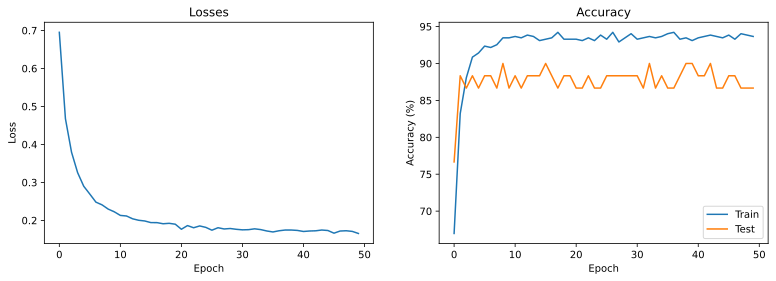

In [69]:
### Test the model once with a bit of data, just to make sure the code works

# show the results
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [70]:
# Specify the parameters for the model
nNodesInModel = 80
layersRange = [1, 5, 10, 20]
nDatapoints = np.arange(50, 551, 50)

# create a legend for later plotting
legend = []

# print out the model architecture
for lidx, layers in enumerate(layersRange):

  # create a model
  units_per_layer = int(nNodesInModel / layersRange[lidx])
  net = createTheQwertyNet(units_per_layer, layers)[0]

  # count its parameters (see lecture ANNs: Depth vs breadth)
  nparams = np.sum([p.numel() for p in net.parameters() if p.requires_grad])

  legend.append('%s layers, %s units, %s params' % (layers, units_per_layer, nparams))

  print(f"This model will have {layers} layers, each with {units_per_layer} units, totalling {nparams} parameters.")

This model will have 1 layers, each with 80 units, totalling 483 parameters.
This model will have 5 layers, each with 16 units, totalling 1187 parameters.
This model will have 10 layers, each with 8 units, totalling 699 parameters.
This model will have 20 layers, each with 4 units, totalling 407 parameters.


In [71]:
net

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=4, bias=True)
    (hidden1): Linear(in_features=4, out_features=4, bias=True)
    (hidden2): Linear(in_features=4, out_features=4, bias=True)
    (hidden3): Linear(in_features=4, out_features=4, bias=True)
    (hidden4): Linear(in_features=4, out_features=4, bias=True)
    (hidden5): Linear(in_features=4, out_features=4, bias=True)
    (hidden6): Linear(in_features=4, out_features=4, bias=True)
    (hidden7): Linear(in_features=4, out_features=4, bias=True)
    (hidden8): Linear(in_features=4, out_features=4, bias=True)
    (hidden9): Linear(in_features=4, out_features=4, bias=True)
    (hidden10): Linear(in_features=4, out_features=4, bias=True)
    (hidden11): Linear(in_features=4, out_features=4, bias=True)
    (hidden12): Linear(in_features=4, out_features=4, bias=True)
    (hidden13): Linear(in_features=4, out_features=4, bias=True)
    (hidden14): Linear(in_features=4, out_features=4, bias=True)
  

In [72]:
19 * 4 * 4 + 4*19 + 4*3 + 3 + 2*4 + 4

407

In [73]:
# Note: takes ~5mins.

# Initialise results matrix
results = np.zeros((len(nDatapoints), len(layersRange), 2))
results.shape

(11, 4, 2)

In [74]:
for didx, pnts in enumerate(nDatapoints):

  # create data (note: same data for each layer manipulation!)
  theData = createSomeData(pnts)
  train_data = theData['train_data']
  test_data = theData['test_data']

  # now loop over layers
  for lidx, layers in enumerate(layersRange):

    units_per_layer = int(nNodesInModel / layersRange[lidx])
    trainAcc, testAcc, losses, net = function2trainTheModel(units_per_layer, layers)

    # average of last 5 accuracies and losses
    results[didx, lidx, 0] = np.mean( testAcc[-5:] )
    results[didx, lidx, 1] = torch.mean( losses[-5:] ).item()

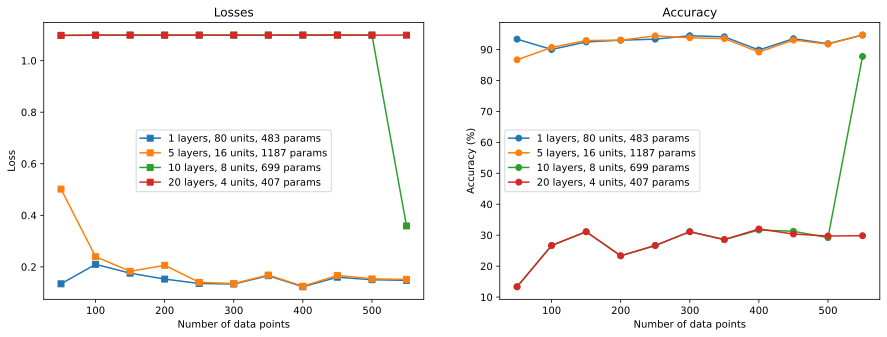

In [75]:
# Show the results!

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(nDatapoints, results[:, :, 1], 's-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDatapoints, results[:, :, 0], 'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)

plt.show()